Domain: Airlines
Project 01: Analyze NYC-Flight data This dataset contains information about all flights that departed from NYC (e.g. EWR, JFK and LGA) in 2013: 336,776 flights in total.

In [130]:
# Import libraries

import numpy as np
import pandas as pd
import calendar

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Check few sample values of user data
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [131]:
# Bring the data
file_path = '/Users/Shankar/PGMS/PYTHON/data/UPX_Academy/Project_EDA/'
flights_raw = pd.read_csv(file_path+'P1_flight_data.csv')

flights_raw.head()
flights_raw.time_hour = pd.to_datetime(flights_raw.time_hour)

airlines_raw = pd.read_csv(file_path+'P1_airlines.csv')
airports_raw = pd.read_csv(file_path+'P1_airports.csv')
# airports_raw.head()

## Airlines with Abbr, names [Useful in many places]
airlines_dict = dict(zip(airlines_raw.carrier , airlines_raw.name.apply(lambda x: x.split(' ')[0])))

## Airport with Abbr, names [Useful in many places]
airports_dict = dict(zip(airports_raw.faa , airports_raw.name.apply(lambda x: ' '.join(x.split(' ')[0:2]))))

flights_raw.describe()
flights_raw.head()
flights_raw.columns
flights_raw.info()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,01-01-2013 05:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,01-01-2013 05:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,01-01-2013 06:00


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(9), object(4)
memory usage: 48.8+ MB


In [132]:
# Missing values handling

num_null = flights_raw.isnull().sum().sort_values(ascending = False)
tot_rows = flights_raw.shape[0]

pd.concat([num_null, round((num_null/tot_rows)*100, 2)], axis = 1, keys = ['Num_of_Null', 'Null_%'])

## Using scheduled time for missing actual values
# Handling arr_time and dep_time NULLS 
flights_raw.loc[flights_raw.arr_time.isnull(), 'arr_time'] = flights_raw.loc[flights_raw.arr_time.isnull(), 'sched_arr_time'] 
flights_raw.loc[flights_raw.dep_time.isnull(), 'dep_time'] = flights_raw.loc[flights_raw.dep_time.isnull(), 'sched_dep_time'] 

# Handling arr_delay and dep_delay NULLS
tmp_arr_minutes = flights_raw.loc[flights_raw.arr_delay.isnull(), 'arr_time'].apply( lambda x: ((int(x)//100)*60) + (int(x)%100)  )
tmp_sched_arr_minutes = flights_raw.loc[flights_raw.arr_delay.isnull(), 'sched_arr_time'].apply( lambda x: ((int(x)//100)*60) + (int(x)%100)  )

tmp_dep_minutes = flights_raw.loc[flights_raw.dep_delay.isnull(), 'dep_time'].apply( lambda x: ((int(x)//100)*60) + (int(x)%100)  )
tmp_sched_dep_minutes = flights_raw.loc[flights_raw.dep_delay.isnull(), 'sched_dep_time'].apply( lambda x: ((int(x)//100)*60) + (int(x)%100)  )

# Re-calculating the delays for the original missed values
flights_raw.loc[flights_raw.arr_delay.isnull(), 'arr_delay'] =  tmp_sched_arr_minutes - tmp_arr_minutes
flights_raw.loc[flights_raw.dep_delay.isnull(), 'dep_delay'] =  tmp_sched_dep_minutes - tmp_dep_minutes

num_null = flights_raw.isnull().sum().sort_values(ascending = False)
tot_rows = flights_raw.shape[0]
pd.concat([num_null, round((num_null/tot_rows)*100, 2)], axis = 1, keys = ['Num_of_Null', 'Null_%'])

# Verify
flights = flights_raw
flights.isnull().sum()

,Num_of_Null,Null_%
air_time,9430,2.80
arr_delay,9430,2.80
arr_time,8713,2.59
dep_time,8255,2.45
dep_delay,8255,2.45
tailnum,2512,0.75
time_hour,0,0.00
sched_arr_time,0,0.00
month,0,0.00
day,0,0.00


,Num_of_Null,Null_%
air_time,9430,2.80
tailnum,2512,0.75
time_hour,0,0.00
sched_arr_time,0,0.00
month,0,0.00
day,0,0.00
dep_time,0,0.00
sched_dep_time,0,0.00
dep_delay,0,0.00
arr_time,0,0.00


year                 0
month                0
day                  0
dep_time             0
sched_dep_time       0
dep_delay            0
arr_time             0
sched_arr_time       0
arr_delay            0
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [135]:
##Some Feature engineering
DELAY_MINS = 10  # Only if the flights are delayed by 10 mins , we consider it as DELAYED

EARLY_MORN_TM = 6
MORN_TM = 12
AFTER_NOON_TM = 17
EVENING = 24

flights['dep_ontime'] = flights.dep_delay < DELAY_MINS
flights['arr_ontime'] = flights.arr_delay < DELAY_MINS
flights['overall_ontime'] =(flights.dep_delay + flights.arr_delay) < DELAY_MINS
flights.head()

def get_hourtype(hour):
    if hour < EARLY_MORN_TM:
        return('EARLY_MORNING')
    elif hour < MORN_TM:
        return('MORNING')
    elif hour < AFTER_NOON_TM:
        return('AFTER_NOON')
    else:
        return('EVENING')
    
# flights.head().hour.apply(get_hourtype)
flights['hour_type'] = flights.hour.apply(get_hourtype)

flights['DayOfYear'] = flights.time_hour.apply(lambda x: x.timetuple()[7])
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,time_hour,Speed,TotDelay,dep_ontime,arr_ontime,overall_ontime
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,227.0,1400,5,15,2013-01-01 05:00:00,370.044053,13.0,True,False,False
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,227.0,1416,5,29,2013-01-01 05:00:00,374.273128,24.0,True,False,False
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,160.0,1089,5,40,2013-01-01 05:00:00,408.375000,35.0,True,False,False
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,183.0,1576,5,45,2013-01-01 05:00:00,516.721311,-19.0,True,True,True
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,116.0,762,6,0,2013-01-01 06:00:00,394.137931,-31.0,True,True,True


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,hour,minute,time_hour,Speed,TotDelay,dep_ontime,arr_ontime,overall_ontime,hour_type,DayOfYear
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,5,15,2013-01-01 05:00:00,370.044053,13.0,True,False,False,EARLY_MORNING,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,5,29,2013-01-01 05:00:00,374.273128,24.0,True,False,False,EARLY_MORNING,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,5,40,2013-01-01 05:00:00,408.375000,35.0,True,False,False,EARLY_MORNING,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,5,45,2013-01-01 05:00:00,516.721311,-19.0,True,True,True,EARLY_MORNING,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,6,0,2013-01-01 06:00:00,394.137931,-31.0,True,True,True,MORNING,1


# Set of exploratory questions
1. On an average which airline is faster or the top 5 airlines that are faster. 


In [136]:
# 1.On an average which airline is faster or the top 5 airlines that are faster?
flights['Speed'] = flights.distance/(flights.air_time / 60)
flights.sort_values('Speed', ascending=False)[['origin','dest','flight','tailnum','Speed']].head(5)

# flights['Speed']=np.round((flights.distance.astype(float)/flights.air_time)*3600).astype(int)
# print('Top 5 fastest flights displayed in miles/hr')
# print('-----------------------------------------------------')
# flights.sort_values('Speed', ascending=False)[['origin','flight','tailnum','dest','Speed']].head(5)

,origin,dest,flight,tailnum,Speed
216447,LGA,ATL,1499,N666DN,703.384615
251999,EWR,MSP,4667,N17196,650.322581
205388,EWR,GSP,4292,N14568,648.000000
157516,EWR,BNA,3805,N12567,641.142857
10223,LGA,PBI,1902,N956DL,591.428571


In [26]:
# 2. Maximum flights to destination

# Approach: 
# step-1: Grouping the flights dataframe by "month and dest" and then find the size of each group
# step-2: Sort the above result based on size and assign it to a temp DF
# step-3: Group the temp DF (created in previous step) by month and taking the first record from each group

## Carriers (By volume)
cols = ['month', 'dest']
top_n = 10
grouped_o = flights.groupby(by = cols, sort = False , as_index = False)
temp_flights = grouped_o.agg('size').sort_values(ascending = False)
temp_flights = temp_flights.reset_index()
temp_flights.columns = ['month','dest', 'Number_of_Flights']
temp_flights['dest_fullname'] = [airports_dict[a] if a in airports_dict else a for a in temp_flights.dest ]
temp_flights.groupby(by = 'month').head(1).sort_values(by = 'month')[['month', 'dest_fullname', 'Number_of_Flights']]





,month,dest_fullname,Number_of_Flights
21,1,Hartsfield Jackson,1396
39,2,Hartsfield Jackson,1267
15,3,Hartsfield Jackson,1448
11,4,Hartsfield Jackson,1490
2,5,Chicago Ohare,1582
5,6,Chicago Ohare,1547
4,7,Chicago Ohare,1573
1,8,Chicago Ohare,1604
3,9,Chicago Ohare,1582
0,10,Chicago Ohare,1604


([<matplotlib.patches.Wedge at 0x10eb372e8>,
  <matplotlib.text.Text at 0x1356639e8>])

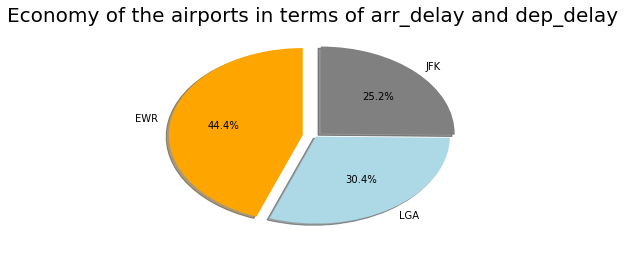

In [137]:
# 3. Analyze and plot economy of the airports in terms of arr_delay and dep_delay

# Approach:
# step-1: Find total delay by adding arrival and departure delays
# step-2: Sum the total delays for each 'Origin' airports
# step-3: Show the delay in % using pie chart

flights['TotDelay']=flights['arr_delay']+flights['dep_delay']
df=flights.groupby('origin')['TotDelay'].sum()
# print(df)
labels=list(flights.origin.unique())
explode = (0.1, 0.0, 0.05)
plt.pie(df, labels=labels, explode=explode, autopct='%1.1f%%',shadow=True, startangle=90, colors=(['Orange','LightBlue','Grey']))
plt.title('Economy of the airports in terms of arr_delay and dep_delay ', size=20)

plt.show()


In [138]:
#4. For each origin airport which flight travelled more distance? 

# Approach
# step-1: Find maximum distance travelled for each origin airport
# step-2: Then get the flight details for the maximum speed trip for each origin using conditional filter

for x in list(flights.origin.unique()):
    print(flights[ (flights.distance==longdist[x]) & (flights.origin == x) ][['origin','dest','flight','tailnum','distance']].head(1))

    origin dest  flight tailnum  distance
379    EWR  HNL      15  N76065      4963
   origin dest  flight tailnum  distance
49    LGA  DEN     883  N569UA      1620
    origin dest  flight tailnum  distance
162    JFK  HNL      51  N380HA      4983


([<matplotlib.patches.Wedge at 0x10f462080>,
  <matplotlib.text.Text at 0x10f47d5c0>])

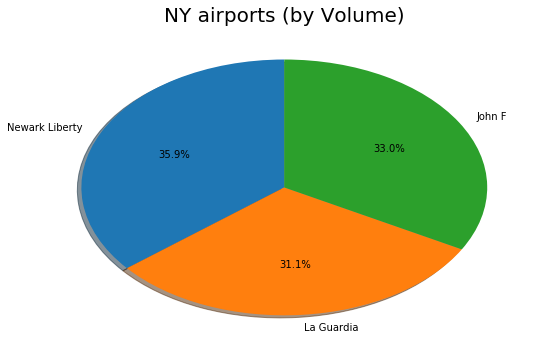

In [66]:
# 5. % of flights from origin airports 

# Approach
# step-1: Find total number of flights for each origin airport
# step-2: Plot the result in pie chart

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)

## Originated flights (By volume)
cols = ['origin']
grouped_o = flights.groupby(by = cols, sort = False , as_index = False)
temp_flights = grouped_o.agg('size')  #.sort_values(by = 'size', ascending = False)
ny_airports = list(grouped_o.groups.keys())


# flights[cols].describe()
plt.subplot(3,2,3)
plt.title('NY airports (by Volume)', size=20)
plt.pie(temp_flights.values,   autopct='%1.1f%%', labels=[airports_dict[a] for a in temp_flights.index],
        shadow=True, startangle=90)

In [139]:
# 6. Top 10 most delayed flights 

# Approach
# step-1: Sort based on highest total delayed flights
# step-2: Then take the top-10 of such flights and display

flights.sort_values('TotDelay', ascending=False)[['origin','flight','tailnum','dest','TotDelay']].head(10)

,origin,flight,tailnum,dest,TotDelay
7072,JFK,51,N384HA,HNL,2573.0
235778,JFK,3535,N504MQ,CMH,2264.0
8239,EWR,3695,N517MQ,ORD,2235.0
327043,JFK,177,N338AA,SFO,2021.0
270376,JFK,3075,N665MQ,CVG,1994.0
173992,JFK,2391,N959DL,TPA,1891.0
151974,LGA,2119,N927DA,MSP,1826.0
270987,LGA,2047,N6716C,ATL,1793.0
87238,EWR,172,N5DMAA,MIA,1774.0
195711,EWR,3744,N523MQ,ORD,1753.0


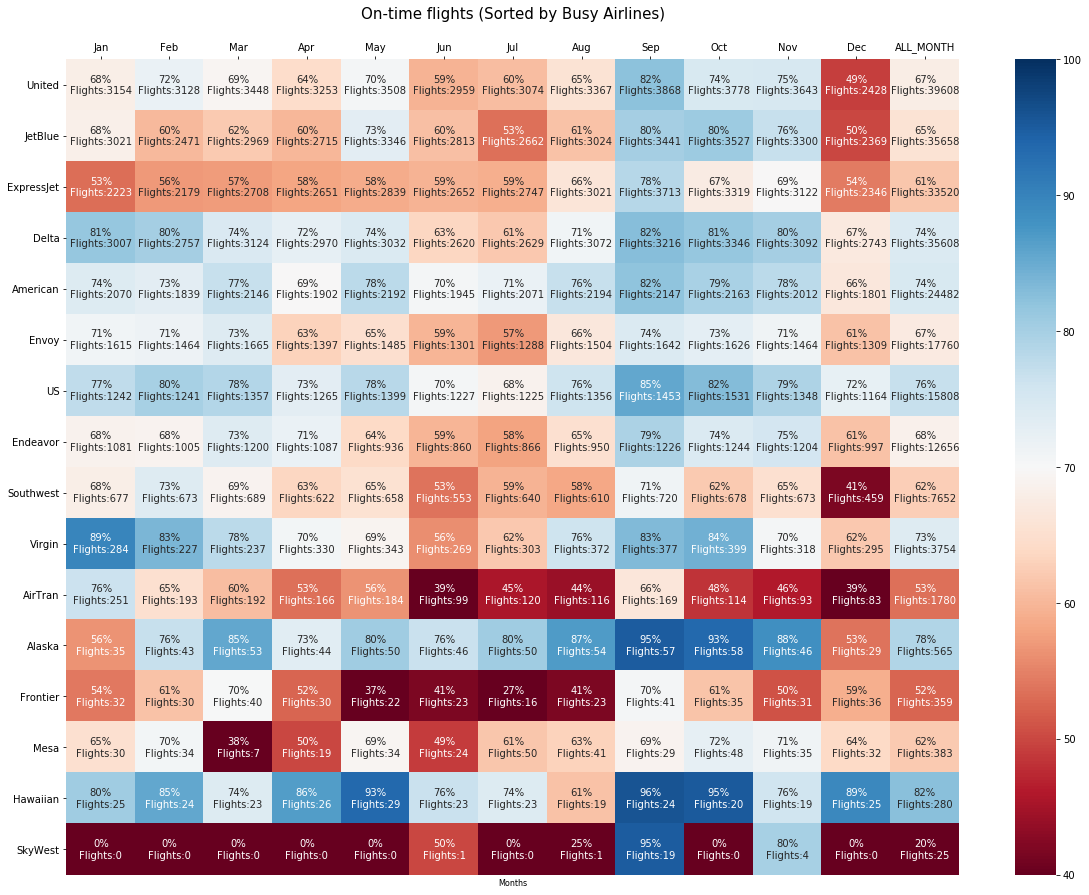

In [140]:
# 7. On time airlines in % for each month

# Approach
# step-1: % of on_time flights
#          Create pivot table with index = 'month' , columns = 'carrier' ,values = 'overall_ontime', agg_func = mean()

# step-2: Number of on_time flights
#       Create another pivot table with index = 'month' , columns = 'carrier' ,values = 'overall_ontime', agg_func = sum()

# step-3: To order the columns, drop the empty level
# step-4: Get the "busy carriers - custom dict", a dictionary with carriers ranked based on number of flights flown in that year

# step-5: Sort the pivot tables(step-1,2) columns based on "busy carriers - custom dict" from previous step
# step-6: Expand months and carrier names for readability
# step-7: Add additional column 'ALL_MONTH' for the whole year

# step-8: Creating custom label for heatmap which contains both on_time "percentage and number_of_flights"

# step-9: Set the x-axis tick labels at the top for readability
# step-10: Generate the heatmap


df_pv_ontime = pd.pivot_table(flights, index = ['month'], columns = ['carrier'], values = ['overall_ontime'], 
                                 aggfunc = (lambda x: round(x.mean()*100,1)  ), fill_value = 0 )
df_pv_ontime_num = pd.pivot_table(flights, index = ['month'], columns = ['carrier'], values = ['overall_ontime'], 
                                 aggfunc = (lambda x: x.sum()    ) , fill_value = 0)


# To order the columns, drop the empty level
df_pv_ontime.columns = df_pv_ontime.columns.droplevel()
df_pv_ontime_num.columns = df_pv_ontime_num.columns.droplevel()

## Get the "busy carriers - custom dict"
custom_dict ={ b: a for a, b in enumerate(flights.groupby(by = 'carrier')['carrier'].count().sort_values(ascending = False).index) }

# Sort the columns bassed on "busy carrier - custom_dict"
df_pv_ontime = pd.DataFrame(df_pv_ontime, columns = sorted(custom_dict, key = custom_dict.get  )).T
df_pv_ontime_num = pd.DataFrame(df_pv_ontime_num, columns = sorted(custom_dict, key = custom_dict.get  )).T

# Abbreviate months and carrier names
df_pv_ontime.columns = [ calendar.month_abbr[a] for a in list(df_pv_ontime.columns) ]
df_pv_ontime.index = [airlines_dict[a]  for a in list(df_pv_ontime.index)]

# Add additional column 'ALL_MONTH' for the whole year
df_pv_ontime['ALL_MONTH'] = df_pv_ontime.mean(axis = 1)
df_pv_ontime_num['ALL_MONTH'] = df_pv_ontime_num.sum(axis = 1)


# Creating custom label for heatmap
ontime_perc = np.asarray(df_pv_ontime).reshape(df_pv_ontime.shape)
ontime_perc_num = np.asarray(df_pv_ontime_num).reshape(df_pv_ontime_num.shape)

custom_label = np.asarray(['{0}%\nFlights:{1}'.format(int(prop) , int(num))
                           for prop, num in zip(ontime_perc.flatten(), ontime_perc_num.flatten())  
                            ]).reshape(df_pv_ontime.shape)

# Generate heatmap
fig, ax = plt.subplots(1, 1, figsize =(20,15))

colormap = plt.cm.RdBu
sns.heatmap(df_pv_ontime, annot= custom_label, vmin = 40, vmax = 100, cmap = colormap, fmt ='' )
ax.xaxis.tick_top()
plt.xlabel('Months', size = 8)
plt.title('On-time flights (Sorted by Busy Airlines)\n\n', size = 15)
plt.show()

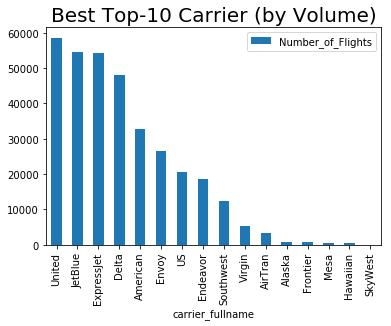

In [141]:
# 8. top 10 busiest airlines 

# Approach
# step-1: Grouping the flights dataframe by "carrier" and then find the size of each group
# step-2: Sort the above result based on size and assign it to a temp DF
# step-3: Expand the carrier abbreviation into full name
# step-4: Plot the above DF in bar chart


## Carriers (By volume)
cols = ['carrier']
top_n = 10
grouped_o = flights.groupby(by = cols, sort = False , as_index = False)
temp_flights = grouped_o.agg('size').sort_values(ascending = False)
temp_flights = temp_flights.reset_index()
temp_flights.columns = ['carrier', 'Number_of_Flights']
temp_flights['carrier_fullname'] = [airlines_dict[a] for a in temp_flights.carrier ]

temp_flights.plot.bar(x='carrier_fullname', y='Number_of_Flights' )
plt.title('Best Top-10 Carrier (by Volume)', size=20)
plt.show()


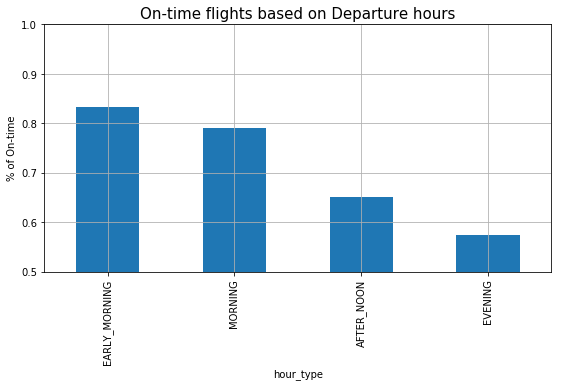

In [91]:
# 9. Most preferred time of the day, generally flights reach on-time 

# Approach
#Step-1: Categorize day as follows:
# Early morning = 12 AM to 6 AM
# Morning = 6 AM to 12 PM
# AN = 12 PM to 6 PM
# Evening = 6PM to 12 AM

#Step-2: Find on-time flights based on above category
#Step-3: Plot it in bar chart with grids


df_temp = flights.groupby(by = 'hour_type')['overall_ontime'].mean()
df_temp = df_temp[['EARLY_MORNING', 'MORNING', 'AFTER_NOON', 'EVENING']]
df_temp.columns = ['EARLY_MORNING \n 0AM-6AM', 'MORNING', 'AFTER_NOON', 'EVENING']

plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace= 0.2, wspace= 0.2)
plt.subplot(2,2,1)
plt.title('On-time flights based on Departure hours', size = 15)
plt.ylabel('% of On-time')
df_temp.plot(kind ='bar', ylim = (0.5,1), grid = True)

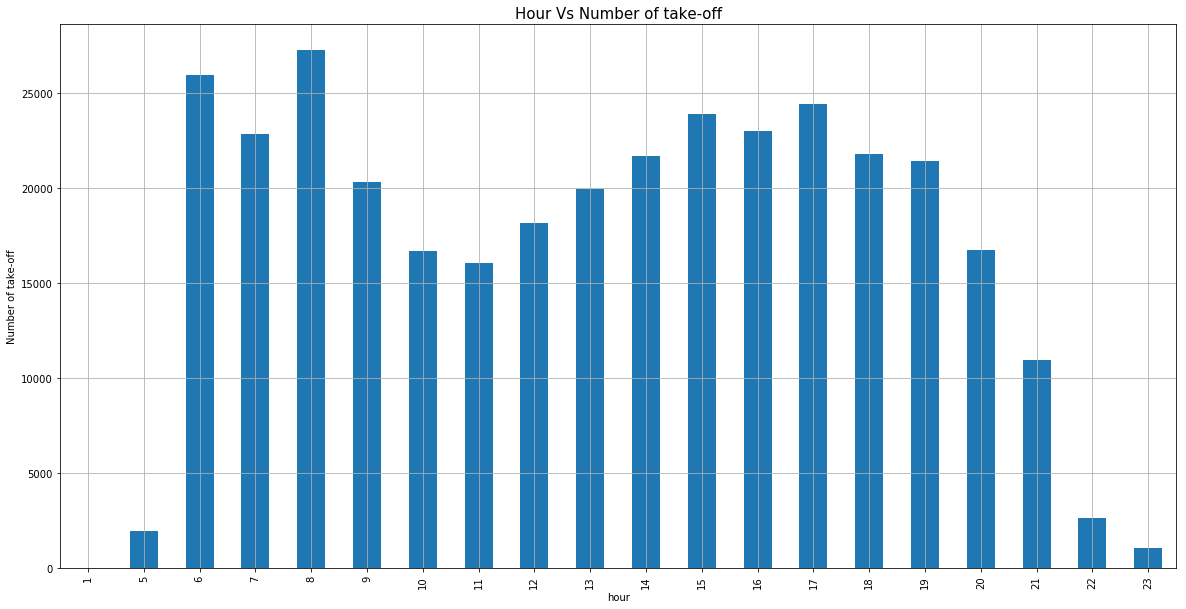

In [142]:
#10. On which hour we have more number of flights taking off?

#Approach
#Step-1: Group the flights based on take-off hours
#Step-2: Find number of flights for each group
#Step-3: Plot it in bar chart

df_temp = flights.groupby(by = 'hour').size()

plt.figure(figsize=(20,10))
plt.title('Hour Vs Number of take-off', size = 15)
plt.ylabel('Number of take-off')
df_temp.plot(kind ='bar', grid = True)


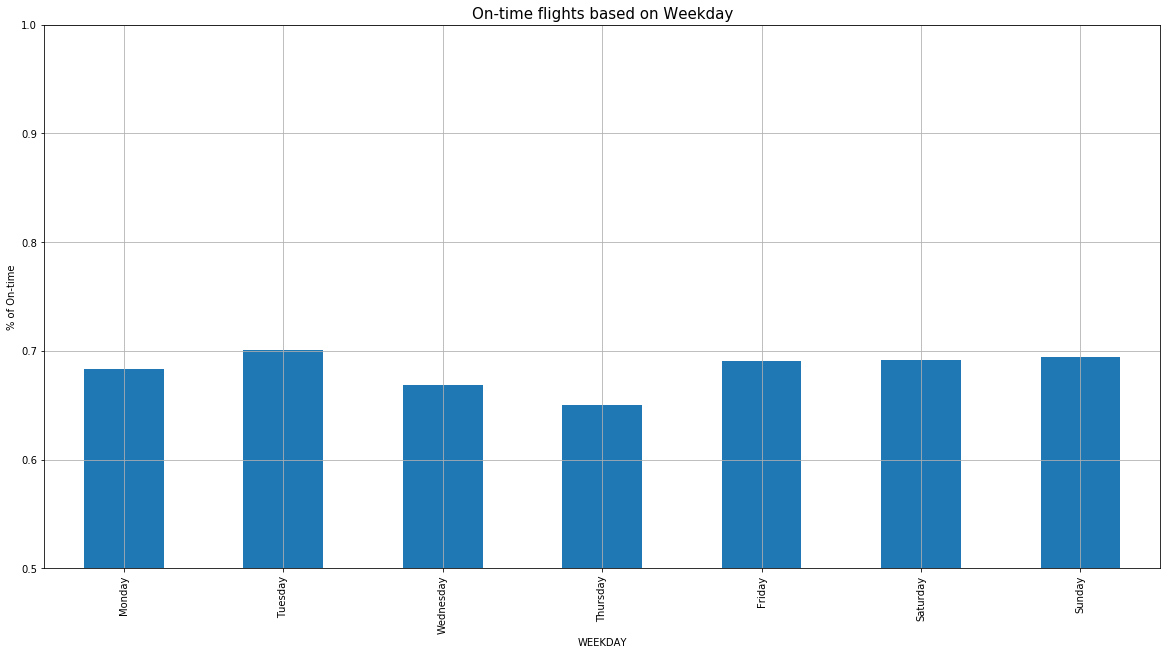

In [143]:
# 11. On- time flight analysis for weekdays 

#Approach
#Step-1: Find weekday(Mon, Tue, etc.,) of each flight's scheduled start date
#Step-2: Group the flights based on weekday
#Step-3: Find the average on-time flights for each weekday
#Step-4: Plot it in chart for visual comparison

### Week_day Vs Delay
flights['WEEKDAY'] = flights.time_hour.apply(lambda x: pd.to_datetime(x).strftime('%A'))

df_temp = flights.groupby(by = 'WEEKDAY')['overall_ontime'].mean()
df_temp = df_temp[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

plt.figure(figsize=(20,10))
plt.title('On-time flights based on Weekday', size = 15)
plt.ylabel('% of On-time')
df_temp.plot(kind ='bar', ylim = (0.5,1), grid = True)

(0, 12)

(0.0, 0.5)

<Container object of 12 artists>

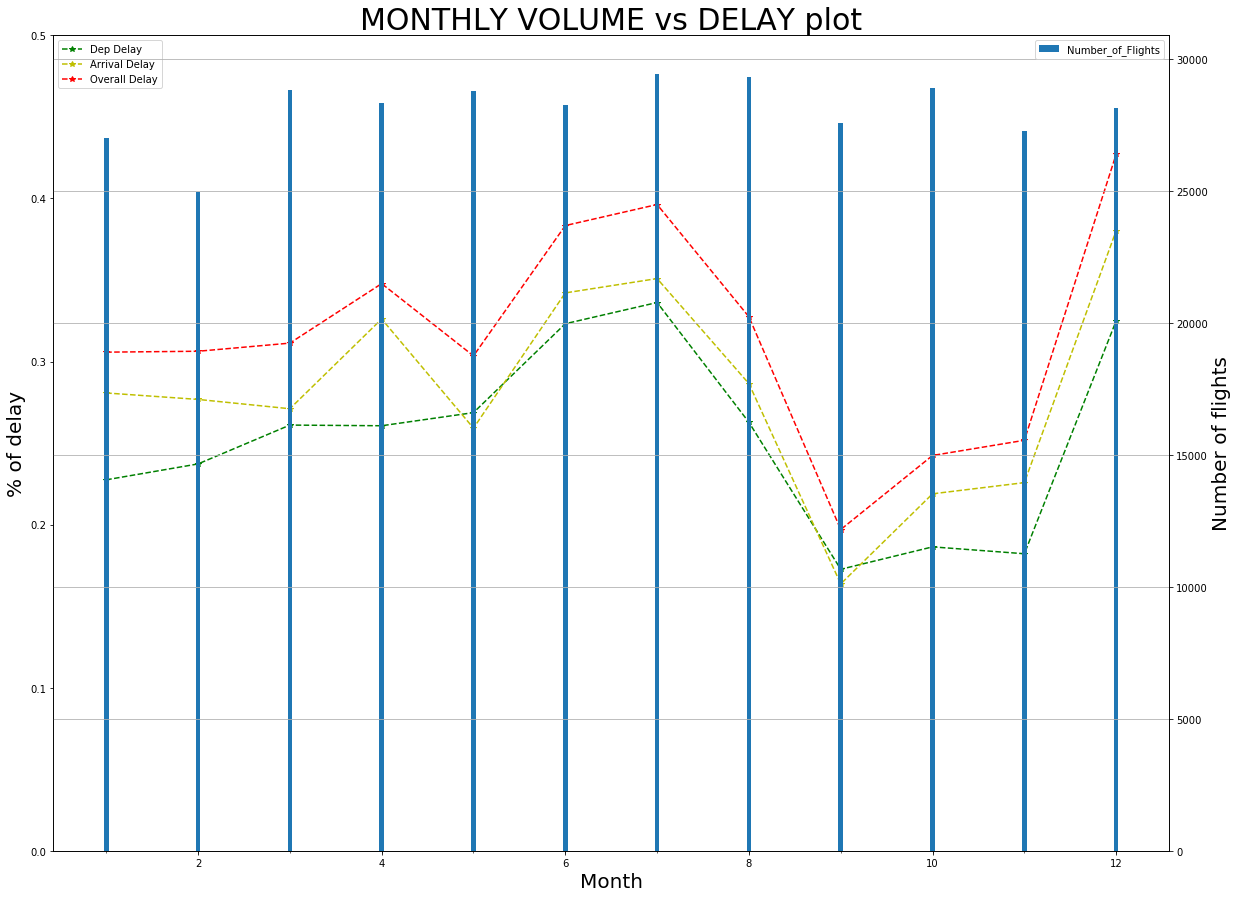

In [147]:
###Bi-variate analysis
#12. Month/Day Vs Volume of flights Vs Delay
### Do some Feature engineering for easy analysis

# Approach
#Step-1: Group the data based on scheduled departure 'month' 
#Step-2: Find departure delay, arrival delay and overall delay for each month
#Step-3: Create an subplot axis(ax1) and plot the delays in that axis
#Step-4: Create another axis(ax2) by copying the x-axis of ax1
#Step-5: Plot "Number of flights" in y-axis of ax2
#Step-6: Set appropriate x_lim for both axis for readability



fig, ax1 = plt.subplots(1, 1, figsize =(20,15))

cols = ['month']
grouped_o = flights.groupby(by = cols, sort = False , as_index = False)
temp_flights = grouped_o.agg('size').sort_index()

# Month vs Delays
grp_month = flights.groupby(by = ['month'])
month_dep_delay_perc = 1 - grp_month.dep_ontime.mean()  # To find delay% subtract from 1
month_arr_delay_perc = 1 - grp_month.arr_ontime.mean()
month_overall_delay_perc = 1 - grp_month.overall_ontime.mean()

month_abbr = calendar.month_abbr[0:]

ax1.plot(list(month_dep_delay_perc.index), month_dep_delay_perc.values, '*g--' , label = 'Dep Delay' )
ax1.plot(list(month_arr_delay_perc.index), month_arr_delay_perc.values, '*y--' , label = 'Arrival Delay' )
ax1.plot(list(month_overall_delay_perc.index), month_overall_delay_perc.values, '*r--' , label = 'Overall Delay' )
# ax1.set_xlim(0,12)
# ax1.set_xticks(list(range(len(month_abbr))), month_abbr )
ax1.set_ylim(0.0,0.5)
ax1.set_title('MONTHLY VOLUME vs DELAY plot', fontdict = {'fontsize': 30})
ax1.set_xlabel('Month', size = 20)
ax1.set_ylabel('% of delay', size = 20)
ax1.legend(loc=2)


ax2 = ax1.twinx()
ax2.bar(list(temp_flights.index), temp_flights.values, label = 'Number_of_Flights', width=.05 )
ax2.set_ylabel('Number of flights', size = 20)
ax2.legend(loc=1)
plt.grid()
plt.show()


